<a href="https://colab.research.google.com/github/DanteAgarwal/Zomato-Data-Analysis/blob/main/Zomata_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
dataframe = pd.read_csv("/content/Zomato_data.csv")
dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
def handleRate(value):
	value=str(value).split('/')
	value=value[0];
	return float(value)

dataframe['rate']=dataframe['rate'].apply(handleRate)

dataframe['approx_cost(for two people)'] = dataframe['approx_cost(for two people)'].replace(',', '', regex=True).astype(int)
dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [38]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [39]:
dataframe.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


Text(0.5, 0, 'Type of restaurant')

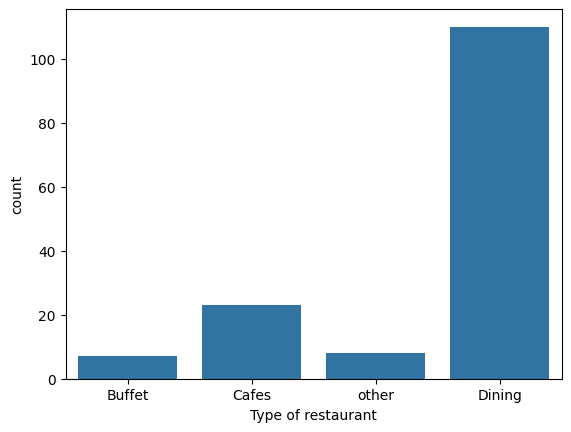

In [7]:
sns.countplot(x=dataframe['listed_in(type)'])
plt.xlabel("Type of restaurant")


###Conclusion: The majority of the restaurants fall into the dining category.

In [10]:
dataframe.groupby('listed_in(type)')['votes'].sum().reset_index()


,listed_in(type),votes
0,Buffet,3028
1,Cafes,6434
2,Dining,20363
3,other,9367


Text(0, 0.5, 'Votes')

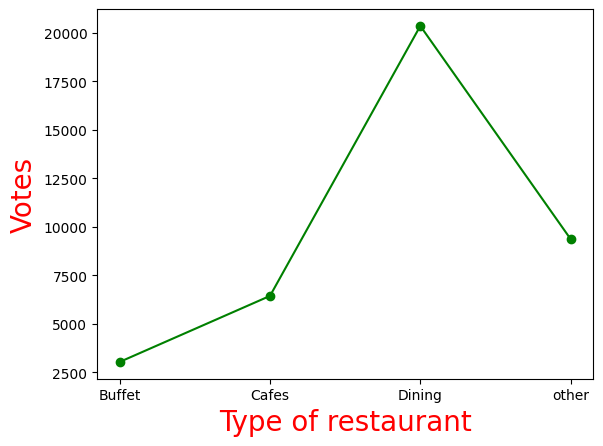

In [11]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c="green", marker="o")
plt.xlabel("Type of restaurant", c="red", size=20)
plt.ylabel("Votes", c="red", size=20)


###Conclusion: Dining restaurants are preferred by a larger number of individuals.

In [12]:
max_votes = dataframe['votes'].max()
dataframe.loc[dataframe['votes'] == max_votes, 'name']


,name
38,Empire Restaurant


<Axes: xlabel='online_order', ylabel='count'>

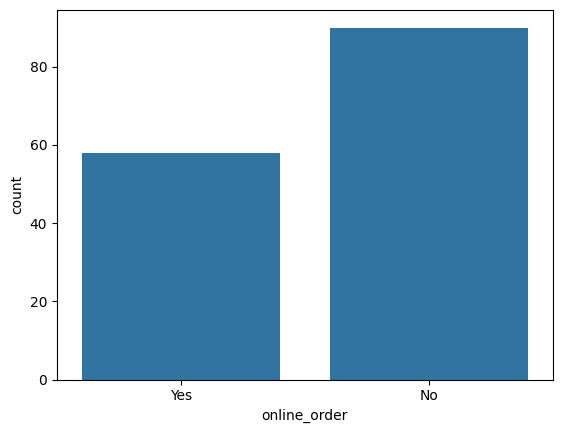

In [13]:
sns.countplot(x=dataframe['online_order'])

In [20]:
dataframe.groupby('online_order')['votes'].sum().reset_index()

,online_order,votes
0,No,6770
1,Yes,32422


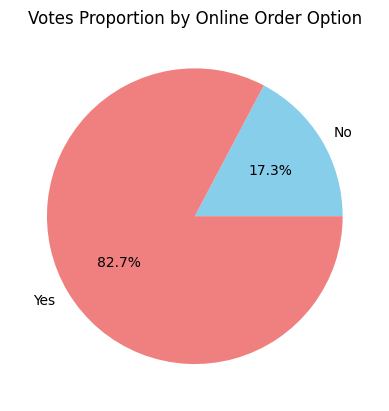

In [21]:
grouped_data = dataframe.groupby('online_order')['votes'].sum().reset_index()
plt.pie(grouped_data['votes'], labels=grouped_data['online_order'], autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Votes Proportion by Online Order Option')
plt.show()


In [33]:
yes_rest_votes = dataframe[dataframe['online_order'] == 'Yes'].groupby('name')['votes'].sum().reset_index()

yes_rest_votes['rank'] = yes_rest_votes['votes'].rank(method='dense', ascending=False)

yes_rest_votes = yes_rest_votes.sort_values(by='votes', ascending=False).reset_index(drop=True)
yes_rest_votes


,name,votes,rank
0,Onesta,5112,1.0
1,Empire Restaurant,4884,2.0
2,Meghana Foods,4401,3.0
3,San Churro Cafe,1836,4.0
4,Kabab Magic,1720,5.0
5,Szechuan Dragon,1647,6.0
6,Recipe,804,7.0
7,Spice Elephant,787,8.0
8,Jalsa,775,9.0
9,Anna Kuteera,771,10.0


In [34]:
yes_rest_votes = dataframe[dataframe['online_order'] == 'Yes'].groupby('name')['rate'].mean().reset_index()

yes_rest_votes['rank'] = yes_rest_votes['rate'].rank(method='dense', ascending=False)

yes_rest_votes = yes_rest_votes.sort_values(by='rate', ascending=False).reset_index(drop=True)
yes_rest_votes


,name,rate,rank
0,Onesta,4.6,1.0
1,Meghana Foods,4.4,2.0
2,Empire Restaurant,4.4,2.0
3,Frozen Bottle,4.2,3.0
4,Cafe Shuffle,4.2,3.0
5,Szechuan Dragon,4.2,3.0
6,The Coffee Shack,4.2,3.0
7,Faasos,4.2,3.0
8,Smacznego,4.2,3.0
9,Wamama,4.2,3.0


In [35]:
no_rest_votes = dataframe[dataframe['online_order'] == 'No'].groupby('name')['votes'].sum().reset_index()

no_rest_votes['rank'] = no_rest_votes['votes'].rank(method='dense', ascending=False)

no_rest_votes = no_rest_votes.sort_values(by='votes', ascending=False).reset_index(drop=True)
no_rest_votes


,name,votes,rank
0,Roving Feast,1047,1.0
1,Gustoes Beer House,868,2.0
2,Jeet Restaurant,808,3.0
3,The Biryani Cafe,520,4.0
4,Caf-Eleven,424,5.0
...,...,...,...
84,Me And My Cake,0,45.0
85,Melting Melodies,0,45.0
86,Mohitesh Hut Roll,0,45.0
87,New Indraprasta,0,45.0


In [36]:
no_rest_rate = dataframe[dataframe['online_order'] == 'No'].groupby('name')['rate'].mean().reset_index()

no_rest_rate['rank'] = no_rest_rate['rate'].rank(method='dense', ascending=False)

no_rest_rate = no_rest_rate.sort_values(by='rate', ascending=False).reset_index(drop=True)
no_rest_rate


,name,rate,rank
0,Corner House Ice Cream,4.3,1.0
1,Peppy Peppers,4.2,2.0
2,Gustoes Beer House,4.1,3.0
3,Spicy Tandoor,4.1,3.0
4,The Biryani Cafe,4.1,3.0
...,...,...,...
84,Hotel Andhra Speices,2.9,15.0
85,Sri Murari Family Restaurant,2.9,15.0
86,Soms Kitchen & Bakes,2.9,15.0
87,LSD Cafe,2.9,15.0


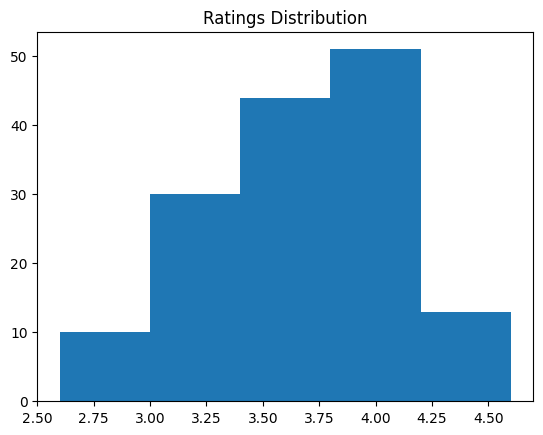

In [17]:
plt.hist(dataframe['rate'],bins=5)
plt.title("Ratings Distribution")
plt.show()

###Conclusion: The majority of restaurants have a rating between 3.5 and 4.0 .

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

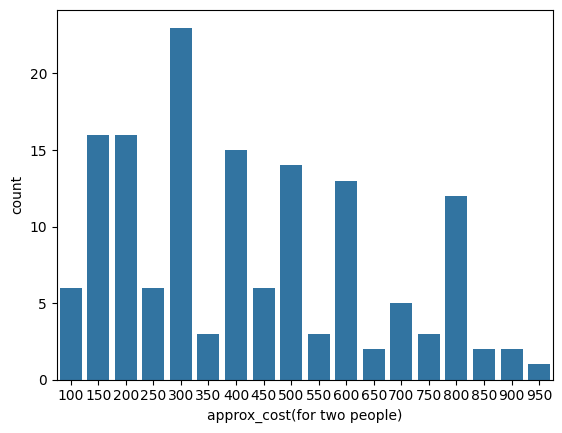

In [25]:
couple_data=dataframe['approx_cost(for two people)']
sns.countplot(x=couple_data)


######Conclusion: The majority of Client like have order around 300 rupees .

<Axes: xlabel='online_order', ylabel='rate'>

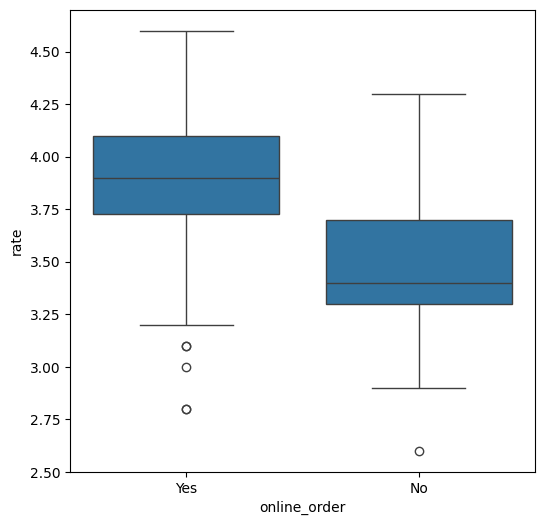

In [26]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)


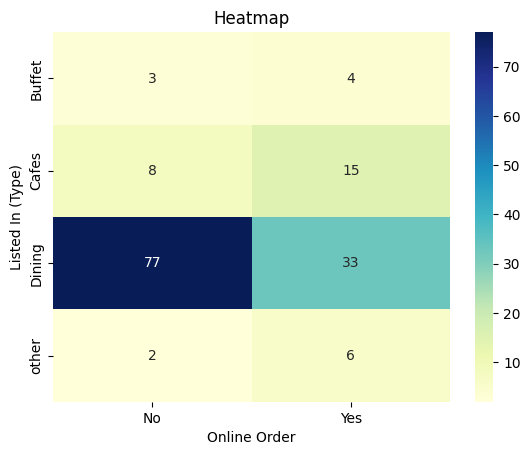

In [27]:
pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()



###CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.

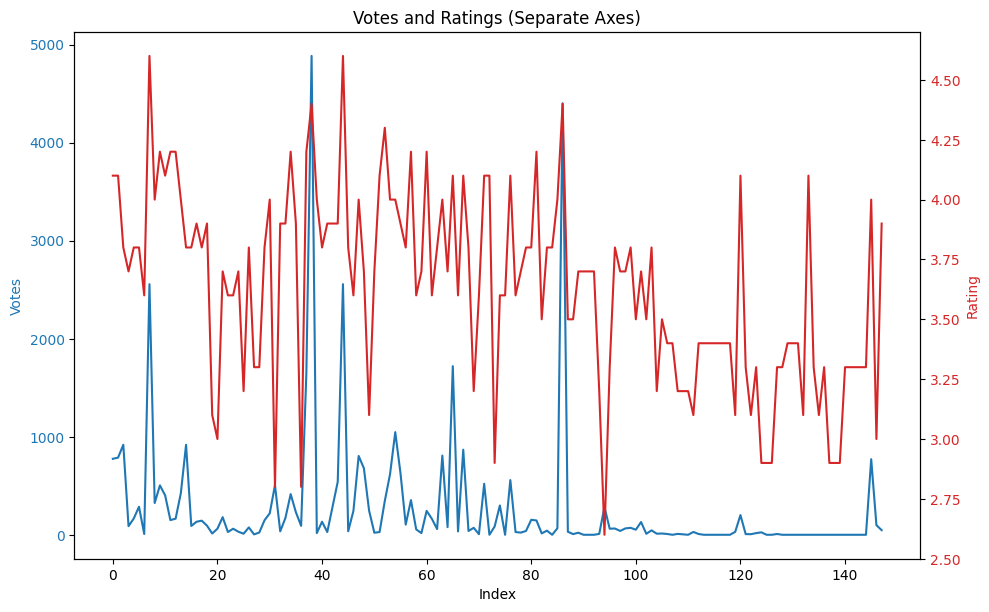

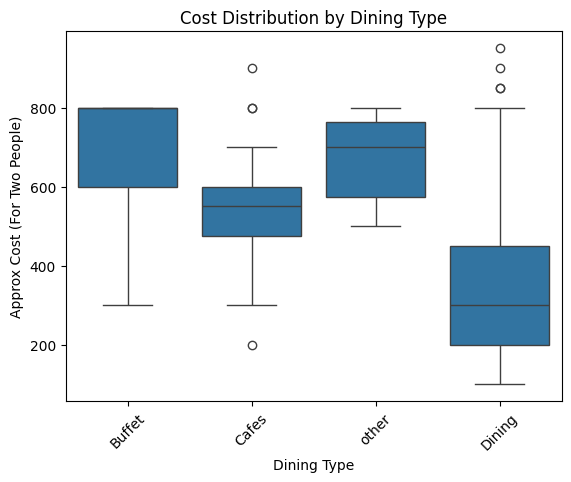

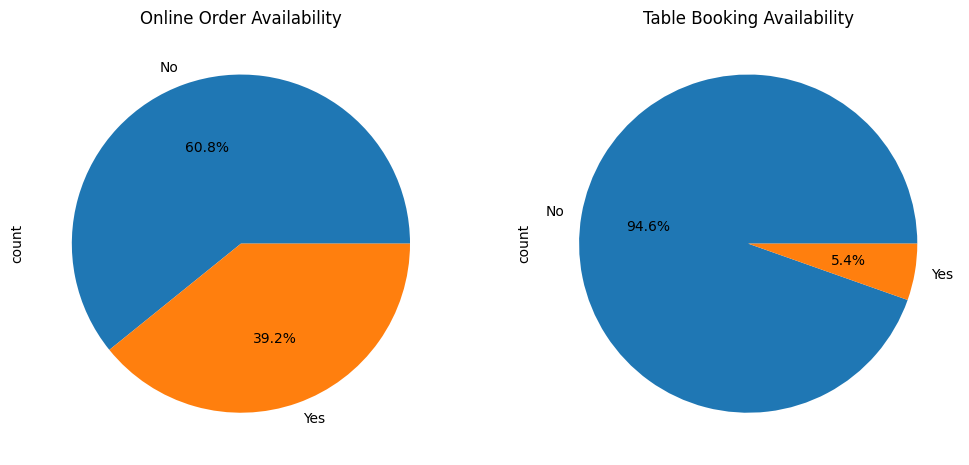

Conclusion:
2. Higher ratings generally correlate with a higher number of votes.
3. Dining type influences pricing, with some categories being more expensive.
4. Online ordering is available in most restaurants, but table booking is relatively less common.


In [5]:
# Exploratory Data Analysis

# Relationship between votes and rating
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Index')
ax1.set_ylabel('Votes', color=color)
ax1.plot(dataframe.index, dataframe['votes'], color=color, label='Votes')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel('Rating', color=color)  # we already handled the x-label with ax1
ax2.plot(dataframe.index, dataframe['rate'], color=color, label='Rating')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Votes and Ratings (Separate Axes)')
plt.show()


# Distribution of approximate cost for two people across types
sns.boxplot(x='listed_in(type)', y='approx_cost(for two people)', data=dataframe)
plt.title('Cost Distribution by Dining Type')
plt.xlabel('Dining Type')
plt.ylabel('Approx Cost (For Two People)')
plt.xticks(rotation=45)
plt.show()

# Proportion of restaurants offering online order and table booking
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
dataframe['online_order'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[0], title='Online Order Availability')
dataframe['book_table'].value_counts().plot.pie(autopct='%1.1f%%', ax=axes[1], title='Table Booking Availability')
plt.show()

# Conclusion Section
print("Conclusion:")
print("2. Higher ratings generally correlate with a higher number of votes.")
print("3. Dining type influences pricing, with some categories being more expensive.")
print("4. Online ordering is available in most restaurants, but table booking is relatively less common.")
